# Data Preparation for Machine Learning (7-Day Mini-Course)

by Jason Brownlee - [Reference](https://machinelearningmastery.com/data-preparation-for-machine-learning-7-day-mini-course/)- June 29, 2020 in [Data Preparation](https://machinelearningmastery.com/category/data-preparation/)

## Crash-Course Overview
Below is a list of the seven lessons that will get you started and productive with data preparation in Python:

- Lesson 01: Importance of Data Preparation
- Lesson 02: Fill Missing Values With Imputation
- Lesson 03: Select Features With RFE
- Lesson 04: Scale Data With Normalization
- Lesson 05: Transform Categories With One-Hot Encoding
- Lesson 06: Transform Numbers to Categories With kBins
- Lesson 07: Dimensionality Reduction with PCA

## Lesson 01: Importance of Data Preparation
In this lesson, you will discover the importance of data preparation in predictive modeling with machine learning.

On a predictive modeling project, such as classification or regression, `raw data` typically cannot be used directly.

There are four main reasons why this is the case:

- `Data Types`: Machine learning algorithms *`require data to be numbers`*.
- `Data Requirements`: Some machine learning algorithms impose requirements on the data.
- `Data Errors`: Statistical *`noise`* and *`errors`* in the data may need to be corrected.
- `Data Complexity`: Complex nonlinear relationships may be teased out of the data.

There are common or standard tasks that you may use or explore during the data preparation step in a machine learning project.

These tasks include:

- `Data Cleaning`: Identifying and correcting mistakes or errors in the data.
- `Feature Selection`: Identifying those input variables that are most relevant to the task.
- `Data Transforms`: Changing the scale or distribution of variables.
- `Feature Engineering`: Deriving new variables from available data.
- `Dimensionality Reduction`: Creating compact projections of the data.

## Lesson 02: Fill Missing Values With Imputation
Data: [Horse Colic Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv)

Will discover how to identify and fill missing values in data.

Filling missing values with data is called `*data imputation*` and a popular approach for data imputation is to `*calculate a statistical*` value for each column (such as a mean) and replace all missing values for that column with the statistic.

1. [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)

In [1]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

# load dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
horsedata = '..//..//data/horse-colic.csv'
dataframe = read_csv(horsedata, header=None, na_values='?')
dataframe.shape

(300, 28)

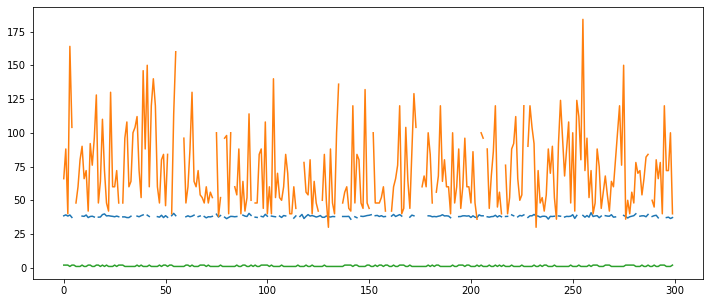

In [2]:
rcParams['figure.figsize'] = 12, 5
plt.plot(dataframe.values[:,3])
plt.plot(dataframe.values[:,4])
plt.plot(dataframe.values[:,23])
plt.show()

In [12]:
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


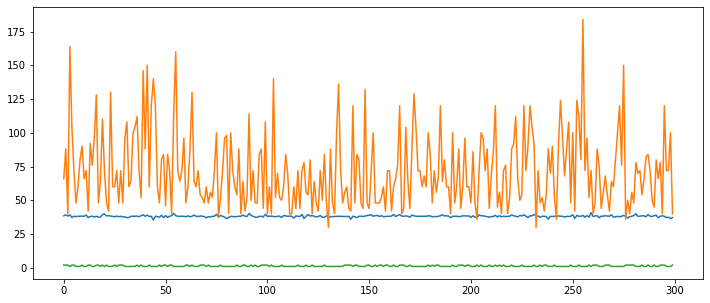

In [13]:
plt.plot(Xtrans[:,3]) # plot column 3
plt.plot(Xtrans[:,4]) # plot column 4
plt.plot(dataframe.values[:,23])
plt.show()

## Lesson 03: Select Features With RFE
Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both `reduce the computational cost` of modeling and, in some cases, to `improve the performance` of the model.

Recursive Feature Elimination, or RFE for short, is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

- 1. Generate a random n-class classification problem [Here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).
- 2. Feature ranking with recursive feature elimination [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In [20]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 5
Column: 1, Selected=False, Rank: 4
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3


In [21]:
print(rfe.ranking_)
print(rfe.support_)

[5 4 1 1 1 6 1 2 1 3]
[False False  True  True  True False  True False  True False]


In [ ]:
## Lesson 04: Scale Data With Normalization

In [ ]:
## Lesson 05: Transform Categories With One-Hot Encoding

In [ ]:
## Lesson 06: Transform Numbers to Categories With kBins

In [ ]:
## Lesson 07: Dimensionality Reduction with PCA